# 1, Imports & display settings

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 200)
plt.rcParams['figure.figsize'] = (12,6)
sns.set_context('talk')

# 2, Load raw CSV and sanity checks

In [3]:
raw_path = "../data/benin.csv"
if not os.path.exists(raw_path):
    raise FileNotFoundError(f"{raw_path} not found. Place raw CSV in data/")

df = pd.read_csv(raw_path)

print("shape:", df.shape)
display(df.head())
display(df.tail())
display(df.info())

shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

None

# 3, Parse Timestamp, convert dtypes, and check duplicates

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

n_bad_ts = df['Timestamp'].isna().sum()
print(f"Bad/missing timestamps: {n_bad_ts}")

if n_bad_ts > 0:
    display(df[df['Timestamp'].isna()].head())

df = df.sort_values('Timestamp').reset_index(drop=True)
df = df.set_index('Timestamp')

dups = df.index.duplicated().sum()
print(f"Duplicate timestamp rows: {dups}")


Bad/missing timestamps: 0
Duplicate timestamp rows: 0


# 4, Summary statistics & missing-value report

In [5]:
num_desc = df.describe().T
display(num_desc)

missing = df.isna().sum().to_frame('n_missing')
missing['pct_missing'] = missing['n_missing'] / len(df) * 100
missing = missing.sort_values('pct_missing', ascending=False)
display(missing)

cols_above_5pct = missing[missing['pct_missing'] > 5].index.tolist()
print("Columns with >5% missing:", cols_above_5pct)

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


,n_missing,pct_missing
Comments,525600,100.0
DNI,0,0.0
TModB,0,0.0
TModA,0,0.0
Precipitation,0,0.0
Cleaning,0,0.0
BP,0,0.0
WDstdev,0,0.0
WD,0,0.0
GHI,0,0.0


Columns with >5% missing: ['Comments']


# 5, Initial cleaning: drop empty columns and obvious fixes

In [6]:
if 'Comments' in df.columns and df['Comments'].isna().all():
    df = df.drop(columns=['Comments'])
    print("Dropped Comments column (all empty).")

if 'Cleaning' in df.columns:
    df['Cleaning'] = pd.to_numeric(df['Cleaning'], errors='coerce').fillna(0).astype(int)

Dropped Comments column (all empty).


# 6, Handle physically impossible values (negatives for irradiance)

In [7]:
irr_cols = [c for c in ['GHI','DNI','DHI'] if c in df.columns]

for c in irr_cols:
    nneg = (df[c] < 0).sum()
    if nneg > 0:
        print(f"{c}: {nneg} negative values -> set to NaN")
        df.loc[df[c] < 0, c] = np.nan

GHI: 258847 negative values -> set to NaN
DNI: 275987 negative values -> set to NaN
DHI: 259182 negative values -> set to NaN


# 7, Z-score outlier detection for target columns

In [8]:
cols_to_z = [c for c in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust'] if c in df.columns]

z_df = df[cols_to_z].copy()
z_scores = z_df.apply(lambda x: np.abs(stats.zscore(x.dropna())), axis=0)

outlier_mask = pd.DataFrame(False, index=df.index, columns=cols_to_z)
for c in cols_to_z:
    col = df[c]
    z = (col - col.mean())/col.std(ddof=0)
    outlier_mask.loc[z.abs() > 3, c] = True

outlier_counts = outlier_mask.sum().to_frame('n_outliers')
outlier_counts['pct_outliers'] = outlier_counts['n_outliers'] / len(df) * 100
display(outlier_counts.sort_values('pct_outliers', ascending=False))

rows_flagged = outlier_mask.any(axis=1).sum()
print(f"Rows flagged as outlier in any monitored column: {rows_flagged}")

,n_outliers,pct_outliers
WSgust,3500,0.665906
WS,3109,0.591514
DHI,136,0.025875
ModB,63,0.011986
ModA,27,0.005137
GHI,0,0.000000
DNI,0,0.000000


Rows flagged as outlier in any monitored column: 4137


# 8, Apply cleaning

In [9]:
impute_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','TModA','TModB','WS','WSgust'] if c in df.columns]

for c in impute_cols:
    med = df[c].median()
    n_missing_before = df[c].isna().sum()
    df[c] = df[c].fillna(med)
    n_missing_after = df[c].isna().sum()
    print(f"{c}: median={med}; missing before={n_missing_before}, after={n_missing_after}")

multi_outliers = outlier_mask.sum(axis=1)
drop_rows = multi_outliers[multi_outliers >= 2].index
print(f"Rows with outliers in >=2 columns: {len(drop_rows)}")
if len(drop_rows) > 0 and len(drop_rows) < 5000:
    df = df.drop(index=drop_rows)
    print(f"Dropped {len(drop_rows)} rows due to multiple outlier flags.")
else:
    print("Not dropping multi-outlier rows (too many or none); they are left after imputation).")


GHI: median=474.2; missing before=258847, after=0
DNI: median=345.7; missing before=275987, after=0
DHI: median=213.4; missing before=259182, after=0
ModA: median=4.5; missing before=0, after=0
ModB: median=4.3; missing before=0, after=0
TModA: median=30.0; missing before=0, after=0
TModB: median=28.9; missing before=0, after=0
WS: median=1.9; missing before=0, after=0
WSgust: median=2.6; missing before=0, after=0
Rows with outliers in >=2 columns: 2698
Dropped 2698 rows due to multiple outlier flags.


# 9, Save cleaned data

In [ ]:
os.makedirs('data', exist_ok=True)
clean_path = "../data/benin_clean.csv"
df.to_csv(clean_path, index=True)
print("Saved cleaned file to:", clean_path)

Saved cleaned file to: data/benin_clean.csv


# 10, Time features and resampling for plotting

In [11]:
df.index = pd.to_datetime(df.index)

df['hour'] = df.index.hour
df['month'] = df.index.month
df['date'] = df.index.date

expected_numeric = ['GHI','DNI','DHI','ModA','ModB','Tamb','TModA','TModB',
                    'RH','WS','WSgust','WSstdev','WD','WDstdev','BP','Precipitation']
for c in expected_numeric:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

numeric_cols = df.select_dtypes(include='number').columns
daily = df[numeric_cols].resample('D').mean()
hourly = df.groupby('hour')[numeric_cols].mean()

print("daily.shape:", daily.shape, "hourly.shape:", hourly.shape)
display(daily[['GHI','DNI','DHI','Tamb']].head())

daily.shape: (366, 19) hourly.shape: (24, 19)


,GHI,DNI,DHI,Tamb
Timestamp,,,,
2021-08-09,459.193315,261.421379,265.463788,28.036769
2021-08-10,440.160139,294.870486,216.077986,28.493403
2021-08-11,323.406324,186.283461,182.450521,25.680681
2021-08-12,433.339986,273.829138,241.003755,27.120376
2021-08-13,359.169653,249.302917,223.143403,25.649583


# 11, Time series plots

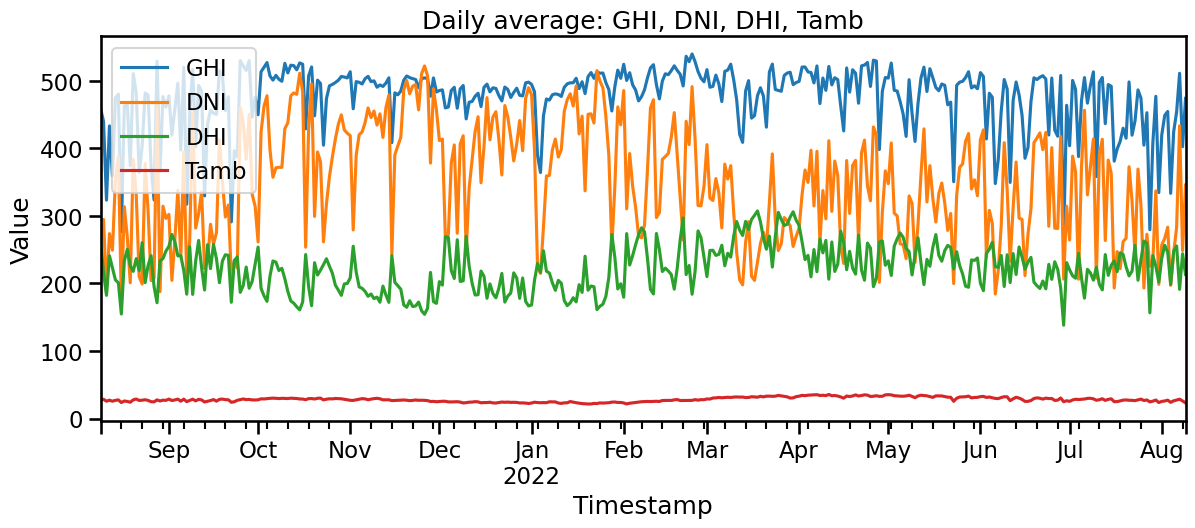

In [12]:
cols_plot = [c for c in ['GHI','DNI','DHI','Tamb'] if c in df.columns]
daily[cols_plot].plot(subplots=False, figsize=(14,5))
plt.title('Daily average: ' + ', '.join(cols_plot))
plt.ylabel('Value')
plt.show()

# 12, Diurnal (hourly) pattern

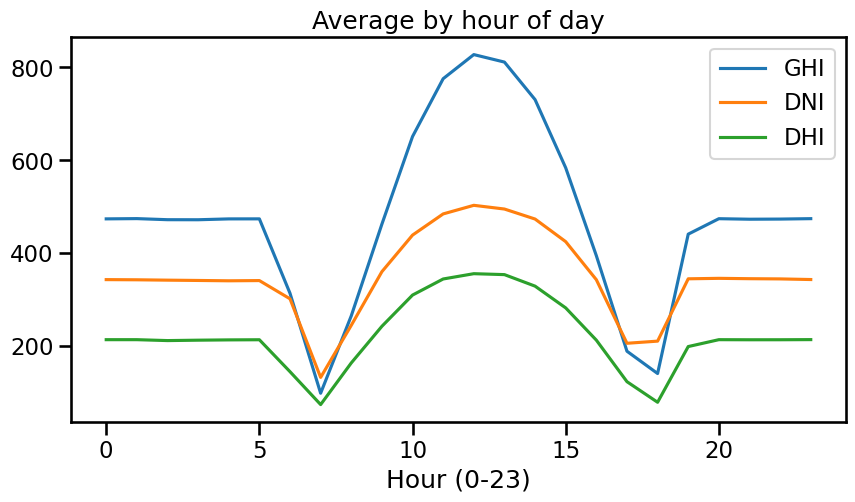

In [15]:
hourly_cols = [c for c in ['GHI','DNI','DHI'] if c in df.columns]
hourly[hourly_cols].plot(figsize=(10,5))
plt.title('Average by hour of day')
plt.xlabel('Hour (0-23)')
plt.show()

# 13, Cleaning impact: ModA & ModB pre/post cleaning

,ModA,ModB
Cleaning,,
0,236.753645,229.072286
1,307.229278,301.972165


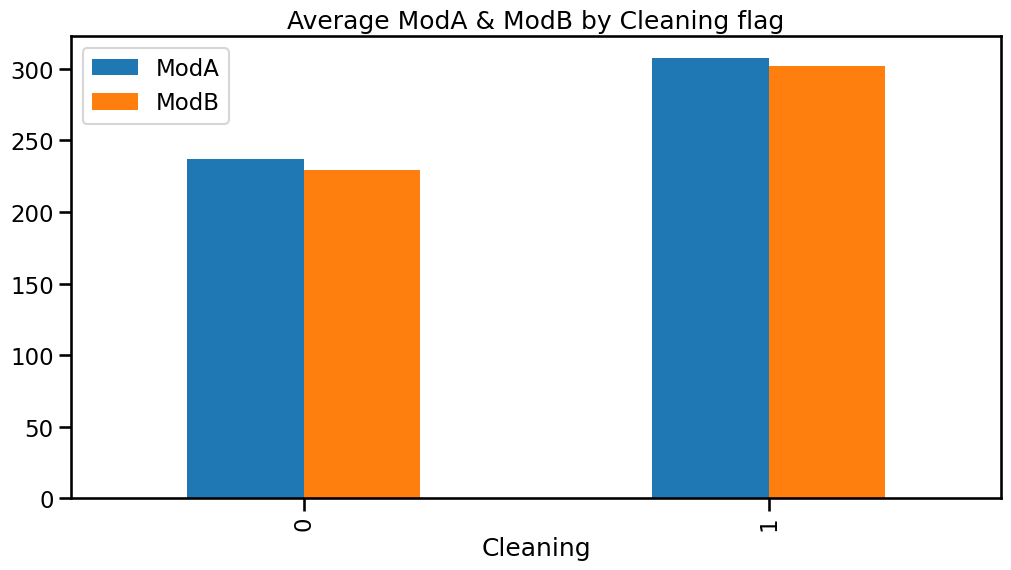

In [16]:
if 'Cleaning' in df.columns and 'ModA' in df.columns and 'ModB' in df.columns:
    grouped = df.groupby('Cleaning')[['ModA','ModB']].mean()
    display(grouped)
    grouped.plot(kind='bar')
    plt.title('Average ModA & ModB by Cleaning flag')
    plt.show()
else:
    print("Cleaning or module columns missing; skipping this step.")

# 14, Correlation heatmap

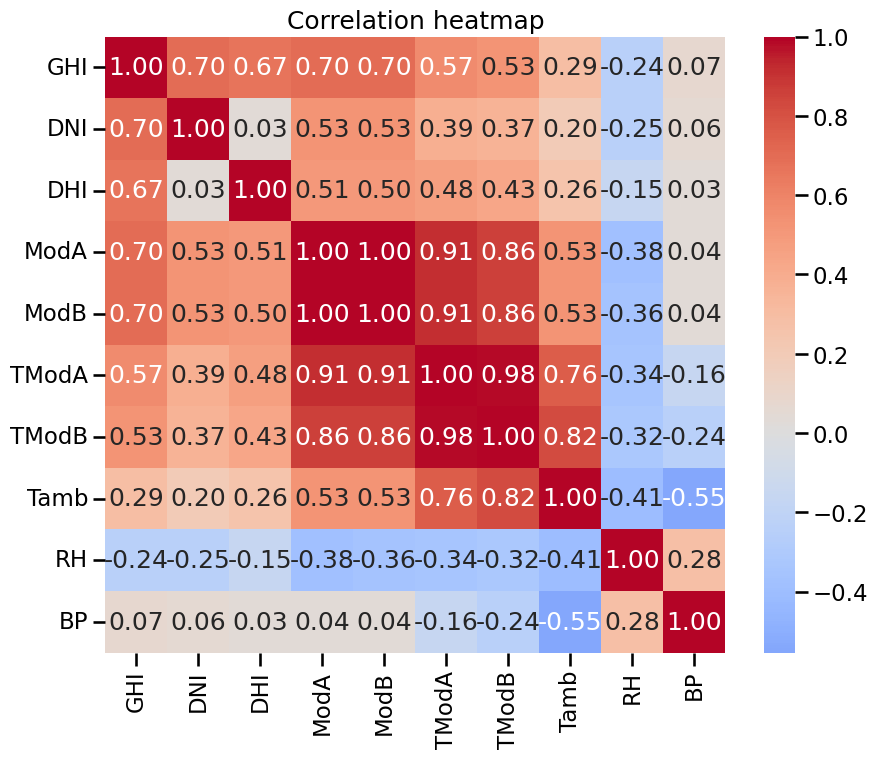

In [17]:
corr_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','TModA','TModB','Tamb','RH','BP'] if c in df.columns]
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation heatmap')
plt.show()

# 15, Scatter plots

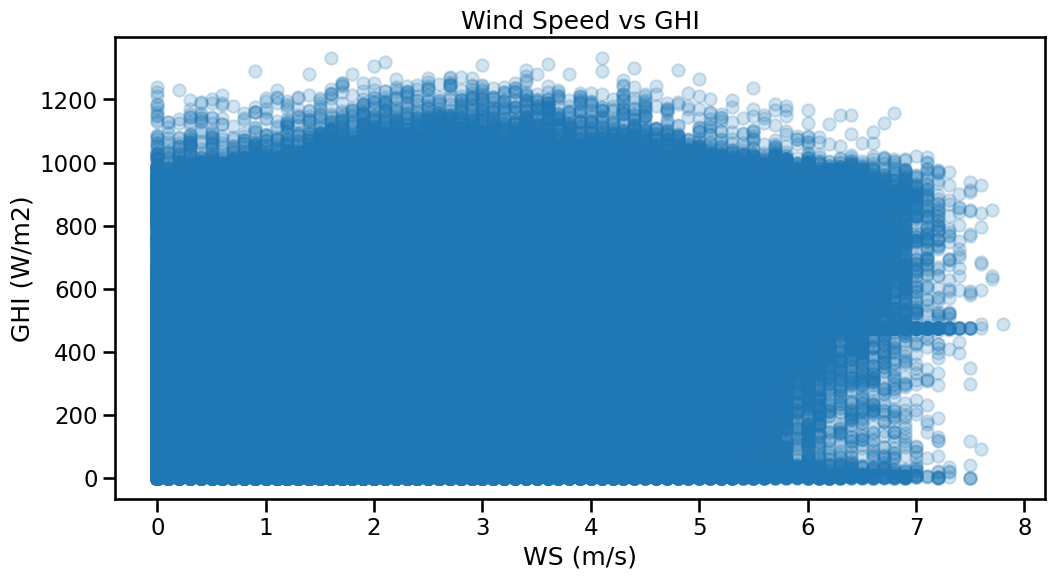

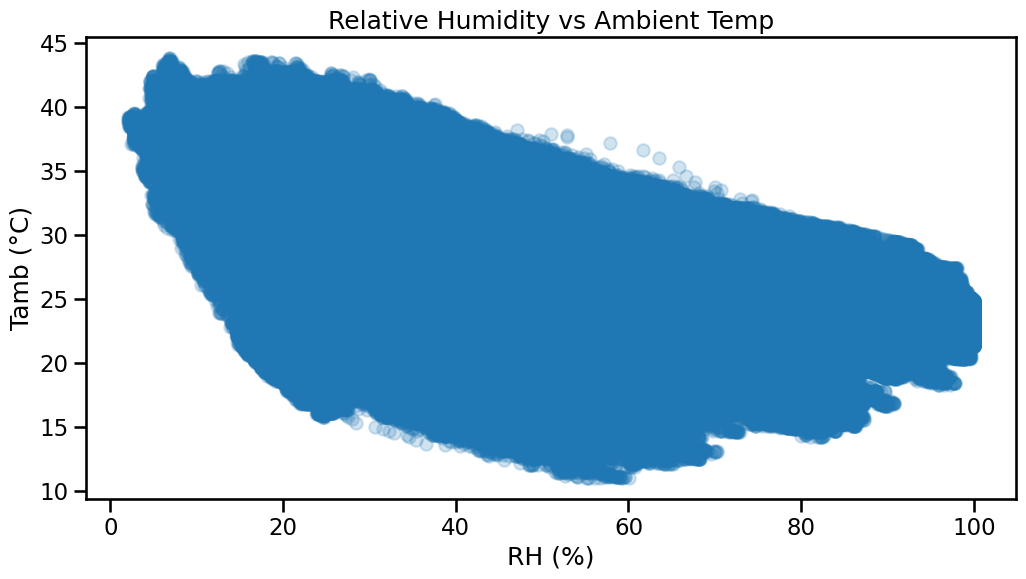

In [13]:
# WS vs GHI
if 'WS' in df.columns and 'GHI' in df.columns:
    plt.scatter(df['WS'], df['GHI'], alpha=0.2)
    plt.xlabel('WS (m/s)'); plt.ylabel('GHI (W/m2)')
    plt.title('Wind Speed vs GHI'); plt.show()

# RH vs Tamb
if 'RH' in df.columns and 'Tamb' in df.columns:
    plt.scatter(df['RH'], df['Tamb'], alpha=0.2)
    plt.xlabel('RH (%)'); plt.ylabel('Tamb (°C)')
    plt.title('Relative Humidity vs Ambient Temp'); plt.show()

# 16, Wind rose

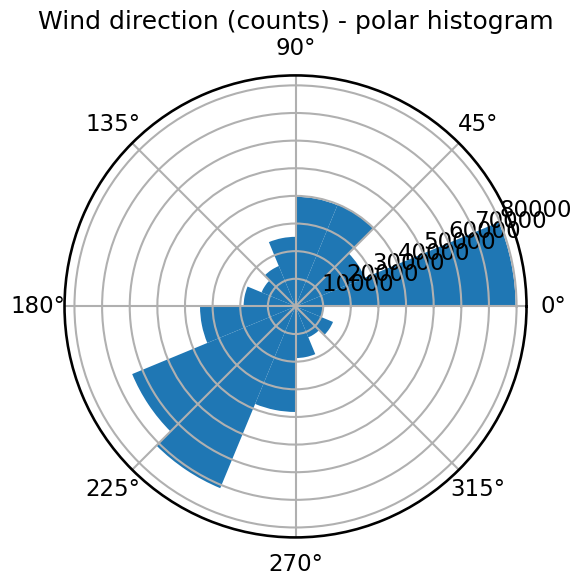

In [14]:
if set(['WD','WS']).issubset(df.columns):
    wd = df['WD'].dropna()
    ws = df['WS'].dropna()
    # use WD to bin directions and show counts
    wd_rad = np.deg2rad(wd)
    bins = 16
    counts, edges = np.histogram(wd_rad, bins=bins)
    angles = (edges[:-1] + edges[1:]) / 2
    ax = plt.subplot(111, polar=True)
    ax.bar(angles, counts, width=(2*np.pi)/bins)
    plt.title('Wind direction (counts) - polar histogram')
    plt.show()
else:
    print("WD or WS missing; skipping wind rose.")

# 17, Bubble chart: GHI vs Tamb (size = RH)

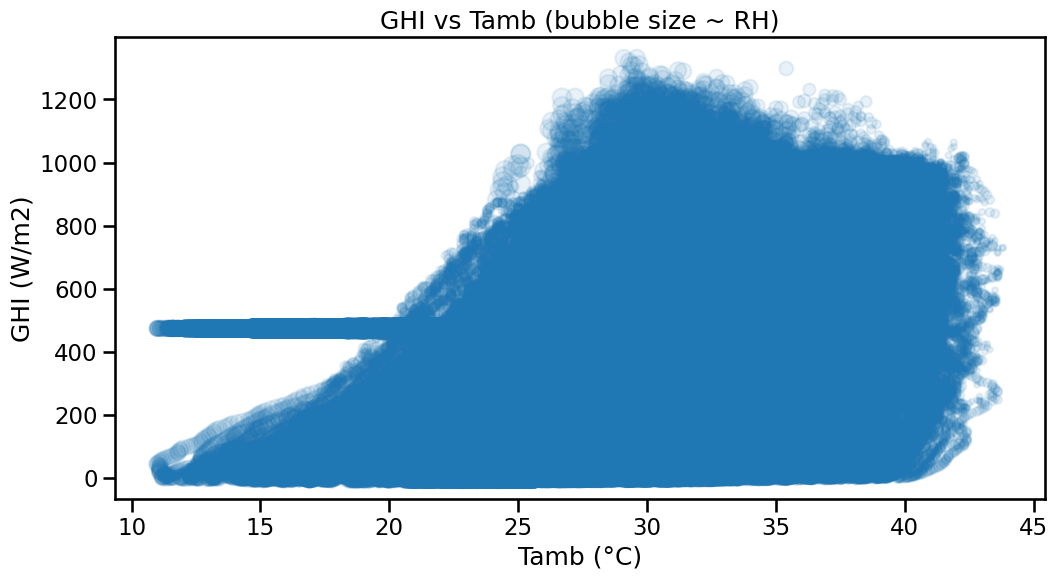

In [15]:
if set(['GHI','Tamb','RH']).issubset(df.columns):
    s = (df['RH'] - df['RH'].min()) / (df['RH'].max() - df['RH'].min()) * 200 + 10
    plt.scatter(df['Tamb'], df['GHI'], s=s, alpha=0.1)
    plt.xlabel('Tamb (°C)'); plt.ylabel('GHI (W/m2)')
    plt.title('GHI vs Tamb (bubble size ~ RH)')
    plt.show()
else:
    print("GHI/Tamb/RH missing; skipping bubble chart.")

# 18, Export summary tables

In [ ]:
summary = df[['GHI','DNI','DHI']].agg(['mean','median','std']).T
summary.to_csv('../data/benin_summary_table.csv')
display(summary)

,mean,median,std
GHI,475.617796,474.2,228.251711
DNI,349.322216,345.7,193.069990
DHI,222.322874,213.4,107.436746
